In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [2]:
from ntscraper import Nitter

In [3]:
scraper = Nitter(log_level=1, skip_instance_check=False)

Testing instances:  92%|█████████▏| 71/77 [01:13<00:03,  1.75it/s]

21-Jun-24 14:23:48 - Certificate did not match expected hostname: nt.ggtyler.dev. Certificate: {'subject': ((('commonName', '4g.ggtyler.dev'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', "Let's Encrypt"),), (('commonName', 'R3'),)), 'version': 3, 'serialNumber': '03A4459CE6DA31CFF555DB78FF3F35BFEA88', 'notBefore': 'May 14 10:55:44 2024 GMT', 'notAfter': 'Aug 12 10:55:43 2024 GMT', 'subjectAltName': (('DNS', '4g.ggtyler.dev'),), 'OCSP': ('http://r3.o.lencr.org',), 'caIssuers': ('http://r3.i.lencr.org/',)}


Testing instances:  94%|█████████▎| 72/77 [01:13<00:02,  1.93it/s]

21-Jun-24 14:23:49 - Certificate did not match expected hostname: nitter.uni-sonia.com. Certificate: {'subject': ((('commonName', '*.xserver.jp'),),), 'issuer': ((('countryName', 'JP'),), (('organizationName', 'CloudSecure Corporation'),), (('commonName', 'CloudSecure RSA Domain Validation Secure Server CA 2'),)), 'version': 3, 'serialNumber': 'ACA67AD2030638EE2DCE8E845B8299A6', 'notBefore': 'Mar 11 00:00:00 2024 GMT', 'notAfter': 'Apr 11 23:59:59 2025 GMT', 'subjectAltName': (('DNS', '*.xserver.jp'), ('DNS', 'xserver.jp')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/CloudSecureRSADomainValidationSecureServerCA2.crt',)}


Testing instances:  99%|█████████▊| 76/77 [01:20<00:01,  1.38s/it]

21-Jun-24 14:23:58 - Certificate did not match expected hostname: nitter.tinfoil-hat.net. Certificate: {'subject': ((('commonName', 'jelly.tinfoil-hat.de'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', "Let's Encrypt"),), (('commonName', 'R3'),)), 'version': 3, 'serialNumber': '044FDE3E7089FB997C3D8AFDE2412CE51554', 'notBefore': 'May 15 09:29:23 2024 GMT', 'notAfter': 'Aug 13 09:29:22 2024 GMT', 'subjectAltName': (('DNS', 'jelly.tinfoil-hat.de'),), 'OCSP': ('http://r3.o.lencr.org',), 'caIssuers': ('http://r3.i.lencr.org/',)}


Testing instances: 100%|██████████| 77/77 [01:22<00:00,  1.08s/it]


In [95]:
tweets = scraper.get_tweets("elonmusk", mode="user", number=700)

21-Jun-24 14:59:28 - No instance specified, using random instance https://nitter.qwik.space
21-Jun-24 14:59:33 - Current stats for elonmusk: 20 tweets, 0 threads...
21-Jun-24 14:59:37 - Current stats for elonmusk: 40 tweets, 0 threads...
21-Jun-24 14:59:41 - Current stats for elonmusk: 58 tweets, 0 threads...
21-Jun-24 14:59:45 - Current stats for elonmusk: 77 tweets, 0 threads...
21-Jun-24 14:59:49 - Current stats for elonmusk: 97 tweets, 0 threads...
21-Jun-24 14:59:53 - Current stats for elonmusk: 117 tweets, 0 threads...
21-Jun-24 14:59:58 - Current stats for elonmusk: 137 tweets, 0 threads...
21-Jun-24 15:00:02 - Current stats for elonmusk: 157 tweets, 0 threads...
21-Jun-24 15:00:06 - Current stats for elonmusk: 176 tweets, 0 threads...
21-Jun-24 15:00:10 - Current stats for elonmusk: 193 tweets, 0 threads...
21-Jun-24 15:00:15 - Current stats for elonmusk: 213 tweets, 0 threads...
21-Jun-24 15:00:19 - Current stats for elonmusk: 233 tweets, 0 threads...
21-Jun-24 15:00:23 - Curr

In [72]:
from pprint import pprint

In [73]:
pprint(tweets)

{'threads': [], 'tweets': []}


In [19]:
tweets.keys()

dict_keys(['tweets', 'threads'])

In [20]:
tweets["tweets"][1]

{'link': 'https://twitter.com/elonmusk/status/1803930544830582799#m',
 'text': 'All-In interviews @realDonaldTrump!',
 'user': {'name': 'Elon Musk',
  'username': '@elonmusk',
  'profile_id': '1780044485541699584',
  'avatar': 'https://pbs.twimg.com/profile_images/1780044485541699584/p78MCn3B_bigger.jpg'},
 'date': 'Jun 20, 2024 · 11:18 PM UTC',
 'is-retweet': False,
 'is-pinned': False,
 'external-link': '',
 'replying-to': [],
 'quoted-post': {'link': 'https://twitter.com/theallinpod/status/1803895237540012084#m',
  'text': 'E184: in conversation with @realDonaldTrump, live on @X   (0:00) bestie intros: big house talk!  (1:37) economy: regulation, taxes, tariffs, taming inflation, de-dollarization  (12:02) federal debt: growth, spend control, where to cut, role of energy, nuclear  (20:22) foreign…',
  'user': {'name': 'The All-In Podcast',
   'username': '@theallinpod',
   'profile_id': '1789812359084519424',
   'avatar': 'https://pbs.twimg.com/profile_images/1789812359084519424/hg3j

In [96]:
musk_tweets = []
for tweet in tweets['tweets']:
    musk_tweets.append(tweet["text"])

In [97]:
df= pd.DataFrame(musk_tweets)
df

,0
0,
1,All-In interviews @realDonaldTrump!
2,Falcon 9’s first stage lands on Just Read the ...
3,Sizing for ~130MW of power & cooling this year...
4,This is messed up
...,...
695,😂
696,Join @xAI!
697,Good deal
698,Falcon 9 lands on the A Shortfall of Gravitas ...


In [98]:
lines = list()

for line in musk_tweets:
    words = line.split()
    for w in words:
        lines.append(w)
        
print(lines)

['All-In', 'interviews', '@realDonaldTrump!', 'Falcon', '9’s', 'first', 'stage', 'lands', 'on', 'Just', 'Read', 'the', 'Instructions,', 'completing', 'our', '250th', 'droneship', 'landing', 'Sizing', 'for', '~130MW', 'of', 'power', '&', 'cooling', 'this', 'year,', 'but', 'will', 'increase', 'to', '>500MW', 'over', 'next', '18', 'months', 'or', 'so.', 'Aiming', 'for', 'about', 'half', 'Tesla', 'AI', 'hardware,', 'half', 'Nvidia/other.', 'Play', 'to', 'win', 'or', 'don’t', 'play', 'at', 'all.', 'This', 'is', 'messed', 'up', 'We', 'are', 'nothing', 'without', 'our', 'fans', 'Civilization', 'may', 'end', 'with', 'a', 'bang', 'or', 'with', 'a', 'whimper', '(in', 'adult', 'diapers)', 'Any', 'given', 'AI', 'startup', 'is', 'doomed', 'to', 'become', 'the', 'opposite', 'of', 'its', 'name', '𝕏', 'ads', 'are', 'now', 'powered', 'by', 'A.I.', 'The', 'oldschool', 'Twitter', 'ad', 'system', 'is', 'gone.', 'I', 'strongly', 'recommend', 'advertising', 'your', 'business', 'on', '𝕏.', "It's", 'worth', '

In [99]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [100]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['allin',
 'interview',
 'realdonaldtrump',
 'falcon',
 '9s',
 'first',
 'stage',
 'land',
 'on',
 'just',
 'read',
 'the',
 'instruct',
 'complet',
 'our',
 '250th',
 'droneship',
 'land',
 'size',
 'for',
 '130mw',
 'of',
 'power',
 'cool',
 'this',
 'year',
 'but',
 'will',
 'increas',
 'to',
 '500mw',
 'over',
 'next',
 '18',
 'month',
 'or',
 'so',
 'aim',
 'for',
 'about',
 'half',
 'tesla',
 'ai',
 'hardwar',
 'half',
 'nvidiaoth',
 'play',
 'to',
 'win',
 'or',
 'dont',
 'play',
 'at',
 'all',
 'this',
 'is',
 'mess',
 'up',
 'we',
 'are',
 'noth',
 'without',
 'our',
 'fan',
 'civil',
 'may',
 'end',
 'with',
 'a',
 'bang',
 'or',
 'with',
 'a',
 'whimper',
 'in',
 'adult',
 'diaper',
 'ani',
 'given',
 'ai',
 'startup',
 'is',
 'doom',
 'to',
 'becom',
 'the',
 'opposit',
 'of',
 'it',
 'name',
 'ad',
 'are',
 'now',
 'power',
 'by',
 'ai',
 'the',
 'oldschool',
 'twitter',
 'ad',
 'system',
 'is',
 'gone',
 'i',
 'strong',
 'recommend',
 'advertis',
 'your',
 'busi',
 'on',


In [101]:
stem2=[]

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        
stem2

['allin',
 'interview',
 'realdonaldtrump',
 'falcon',
 '9s',
 'stage',
 'land',
 'read',
 'instruct',
 'complet',
 '250th',
 'droneship',
 'land',
 'size',
 '130mw',
 'power',
 'cool',
 'year',
 'increas',
 '500mw',
 '18',
 'month',
 'aim',
 'half',
 'tesla',
 'ai',
 'hardwar',
 'half',
 'nvidiaoth',
 'play',
 'win',
 'dont',
 'play',
 'mess',
 'noth',
 'fan',
 'civil',
 'end',
 'bang',
 'whimper',
 'adult',
 'diaper',
 'ani',
 'given',
 'ai',
 'startup',
 'doom',
 'becom',
 'opposit',
 'ad',
 'power',
 'ai',
 'oldschool',
 'twitter',
 'ad',
 'system',
 'gone',
 'strong',
 'recommend',
 'advertis',
 'busi',
 'worth',
 'tri',
 'platform',
 'number',
 '1',
 'sourc',
 'news',
 'world',
 'elon',
 'musk',
 'confront',
 'interview',
 'free',
 'speech',
 'edit',
 'elonmusk',
 'convers',
 'cann',
 'lion',
 'cover',
 'advertis',
 'x',
 'free',
 'speech',
 'futur',
 'edit',
 'boost',
 'audio',
 'save',
 'time',
 '30',
 'thank',
 'davidcarbutt',
 'team',
 'work',
 'govern',
 'program',
 'outrag'

In [102]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

df

0
tesla       52
starlink    38
year        38
launch      34
peopl       34
            ..
10th         1
room         1
2740         1
ethic        1
261          1
Name: count, Length: 2113, dtype: int64

In [103]:
from nltk.probability import FreqDist

freqdoc = FreqDist()

for words in df:
    freqdoc[words] +=1
    
freqdoc

FreqDist({1: 1182, 2: 354, 3: 180, 4: 103, 5: 68, 6: 53, 7: 35, 8: 30, 9: 21, 11: 15, ...})

In [104]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

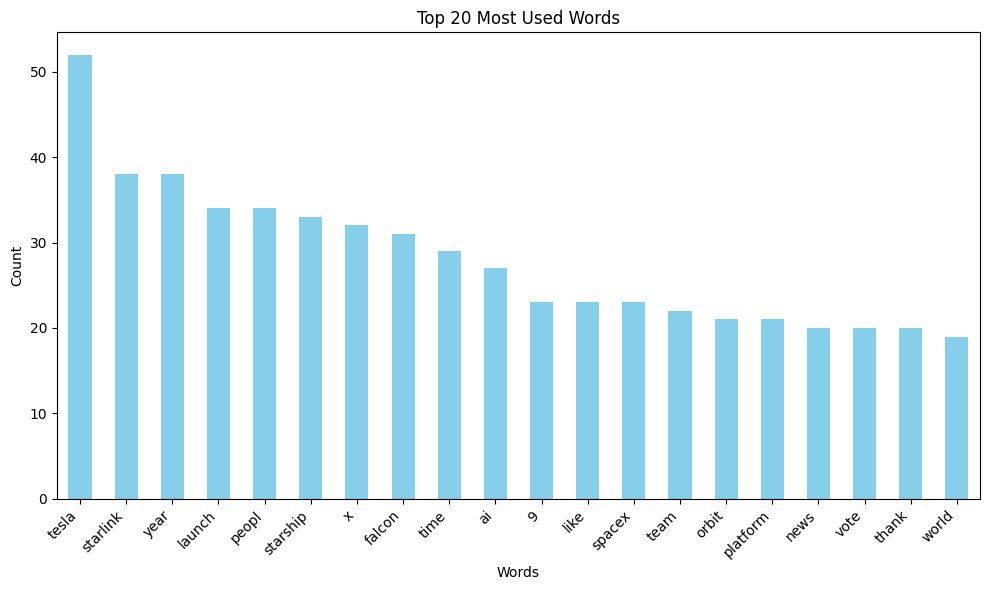

In [105]:

df = df[:20,]

# Create a bar chart
plt.figure(figsize=(10, 6))  
df.plot(kind="bar", color="skyblue")
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 20 Most Used Words")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()


plt.show()

In [51]:
!python3 -m spacy download en_core_web_sm

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [106]:

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [107]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [108]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


In [109]:
df7

Word
Tesla                              22
AI                                 15
Falcon                              8
FSD                                 6
lowEarth                            6
                                   ..
WhatsApp                            1
Improvements to Communities Its     1
The Boring Company                  1
Resorts World                       1
Always                              1
Name: count, Length: 167, dtype: int64

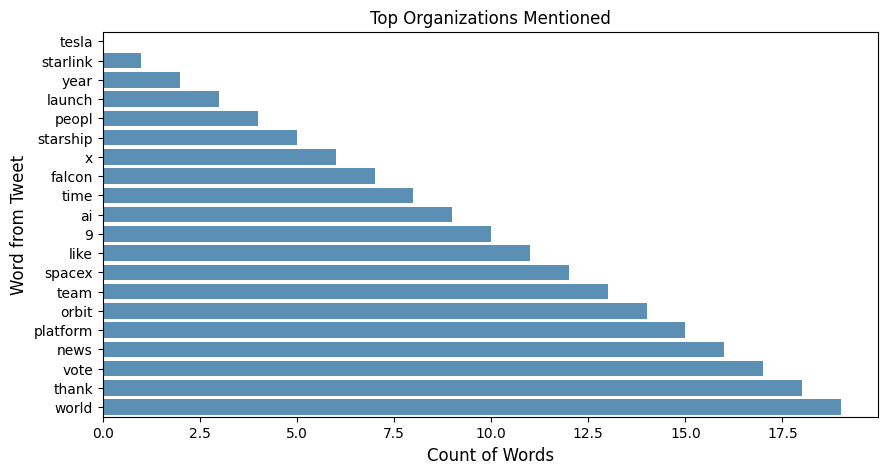

In [110]:
df7 = df7= df7[:10,]
plt.figure(figsize=(10,5))
sns.barplot(df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [111]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


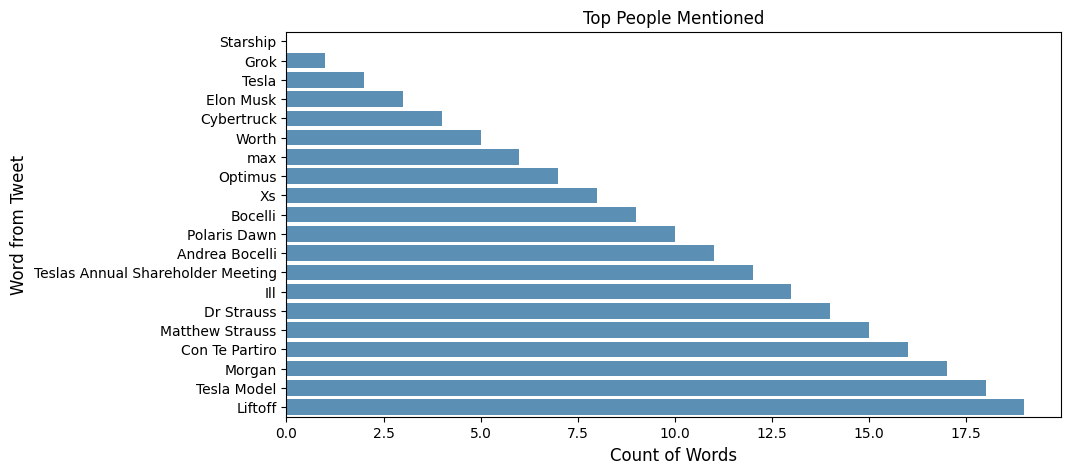

In [112]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()